In [15]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_1samp
from sklearn.linear_model import LinearRegression

In [2]:
# Import data and summary
data = pd.read_csv('crime.csv', encoding='latin-1')
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [3]:
#Data Grooming for NaN Values in Shooting
data.SHOOTING.fillna('N', inplace=True)

Text(-8.950000000000003, 0.5, 'Count')

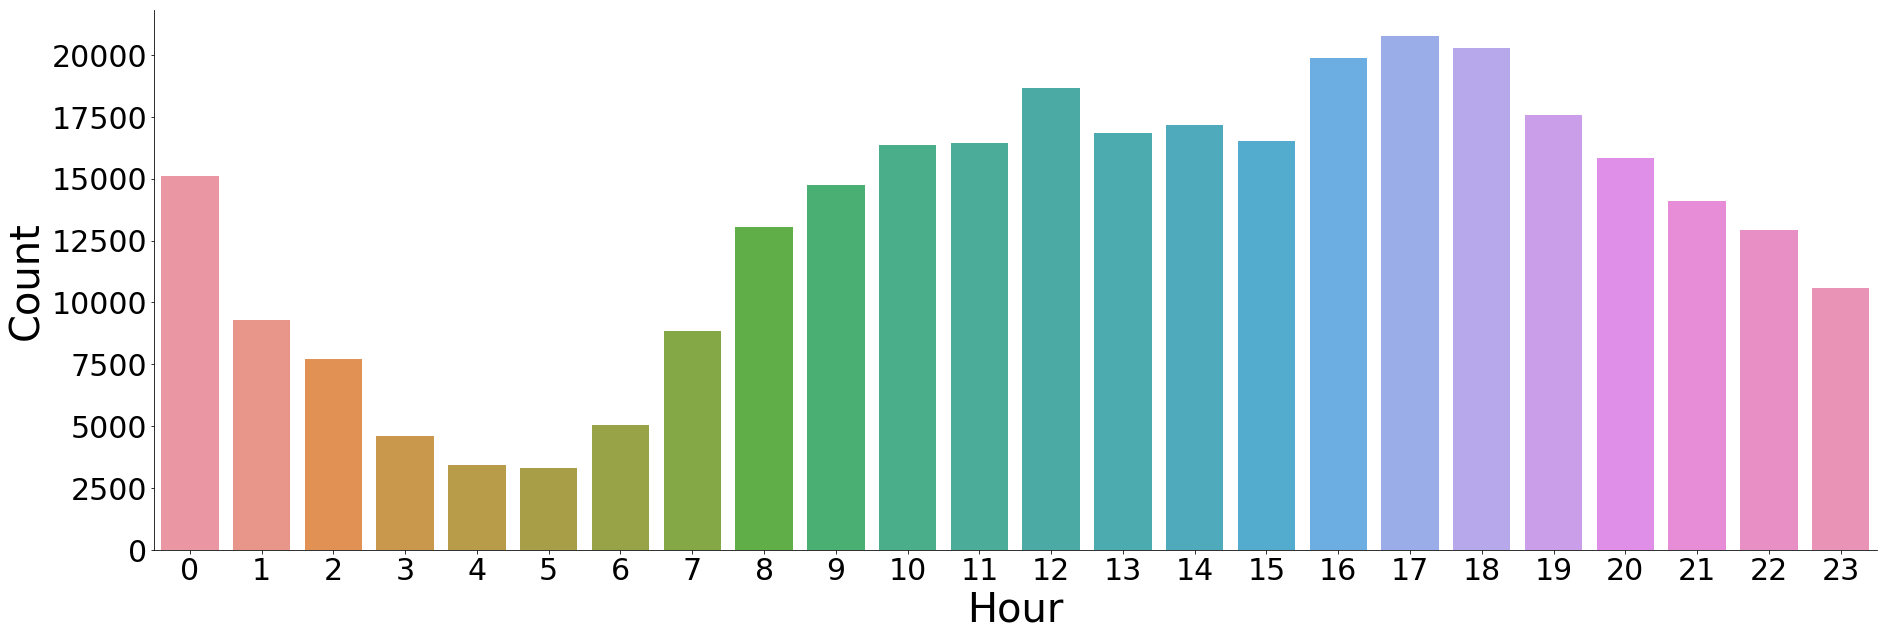

In [4]:
#Time of the data when the most amount of crimes happen
sns.catplot(x='HOUR',
           kind='count',
            height=8.27, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Hour', fontsize=40)
plt.ylabel('Count', fontsize=40)

Text(-8.700000000000003, 0.5, 'Count')

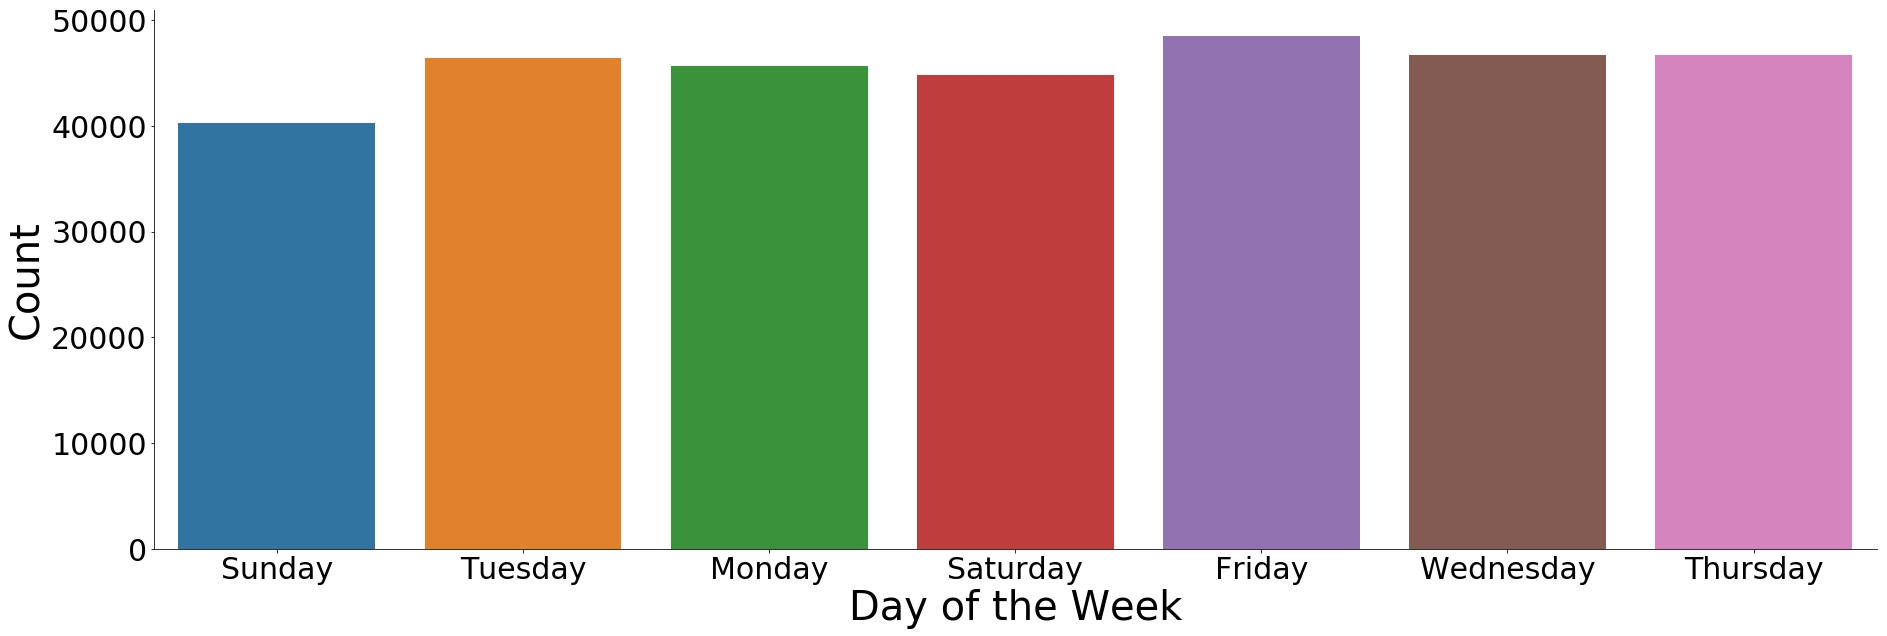

In [5]:
#Day of the week when the most happen
sns.catplot(x='DAY_OF_WEEK',
           kind='count',
            height=8.27, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Day of the Week', fontsize=40)
plt.ylabel('Count', fontsize=40)

Text(-8.825000000000003, 0.5, 'Count')

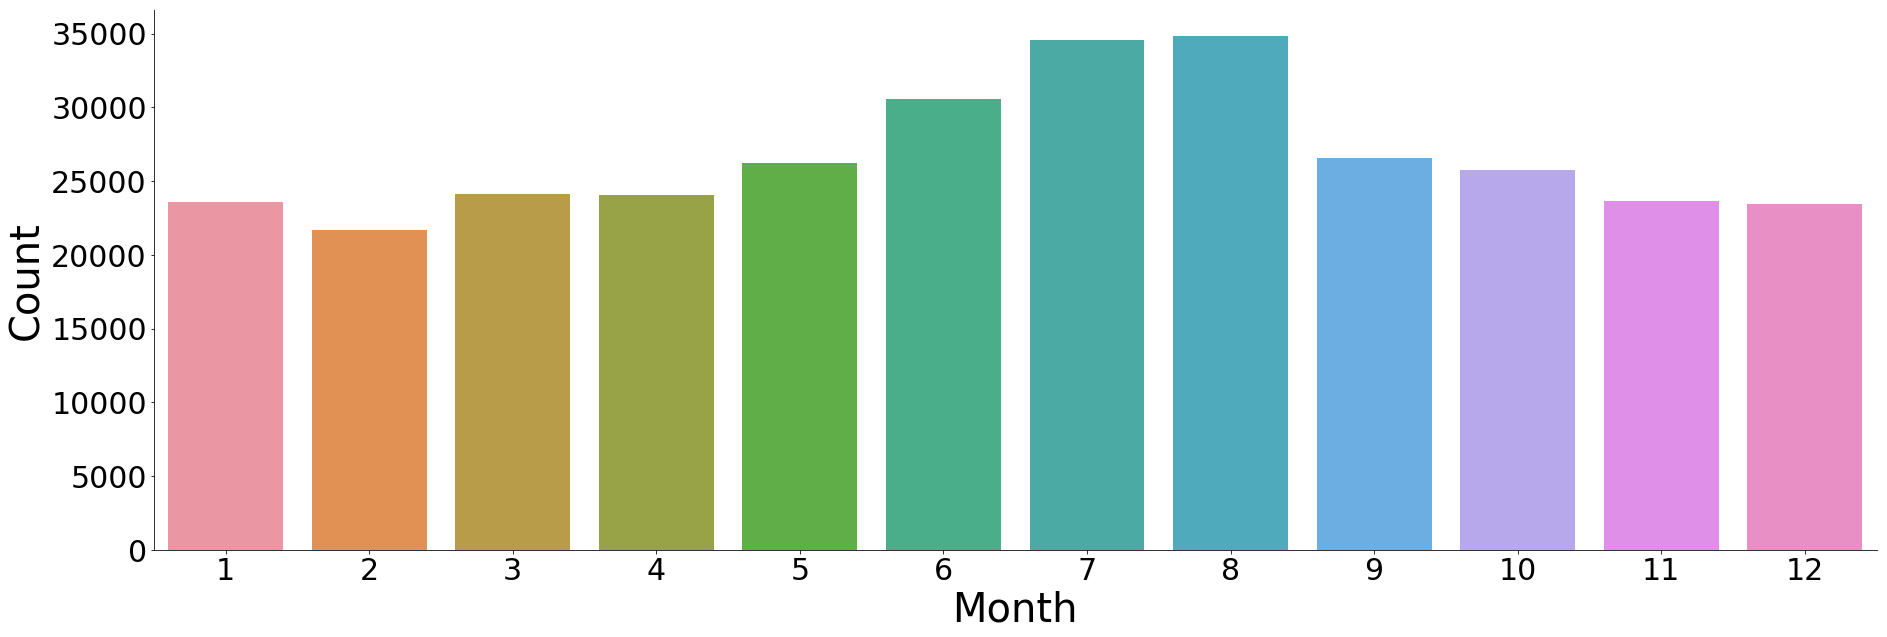

In [6]:
#Day of the week when the most happen
sns.catplot(x='MONTH',
           kind='count',
            height=8.27, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Month', fontsize=40)
plt.ylabel('Count', fontsize=40)

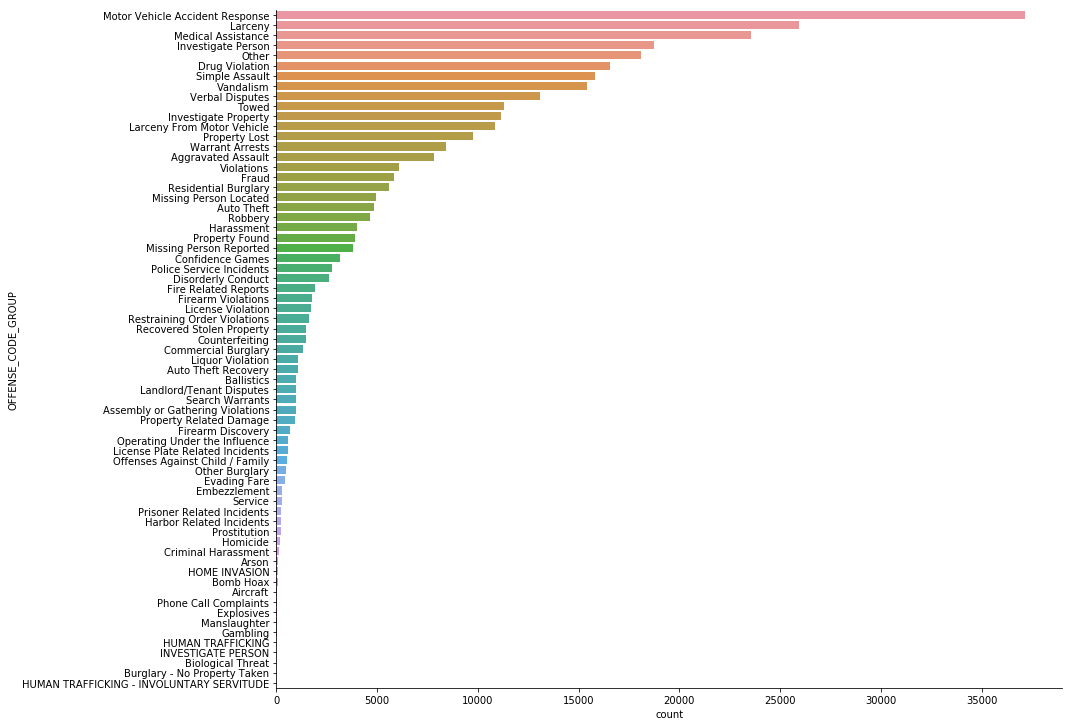

In [7]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=10, 
            aspect=1.5,
            order=data.OFFENSE_CODE_GROUP.value_counts().index,
           data=data)

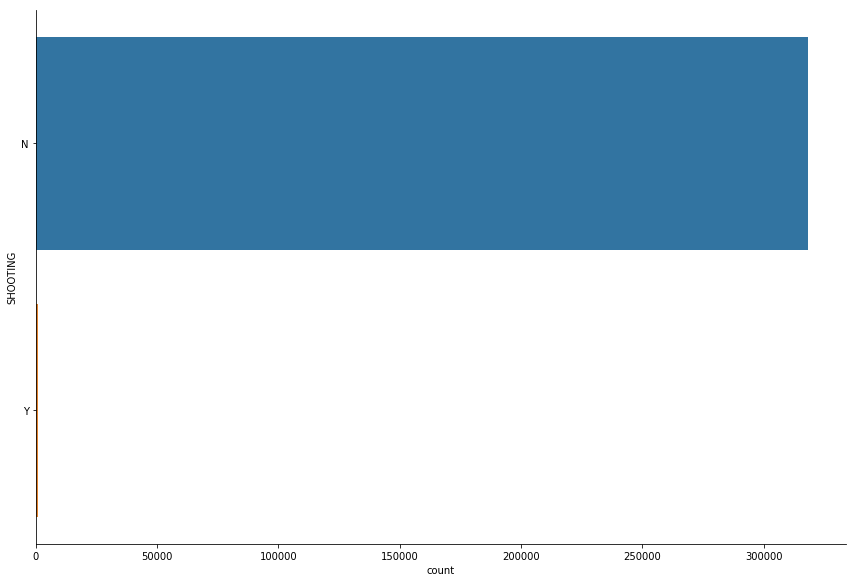

In [8]:
sns.catplot(y='SHOOTING',
           kind='count',
            height=8, 
            aspect=1.5,
            order=data.SHOOTING.value_counts().index,
           data=data)

In [9]:
X = len(data.MONTH)
Z = np.random.normal(size = X)
# method 1
H,X1 = np.histogram( Z, bins = 10, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
#method 2
X2 = np.sort(Z)
F2 = np.array(range(X))/float(X)

plt.plot(X1[1:], F1)
plt.plot(X2, F2)
plt.show()

/Users/lukegruszka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


NameError: name 'N' is not defined

Text(0.5, 1.0, 'Price variation based on car body type')

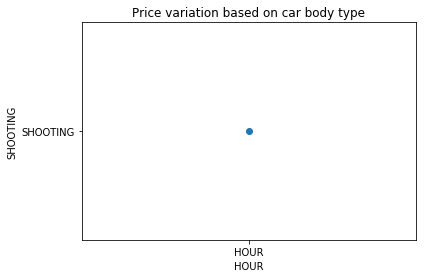

In [10]:

plt.scatter('HOUR', 'SHOOTING')
plt.xlabel('HOUR')
plt.ylabel('SHOOTING')
plt.title('Price variation based on car body type')

/Users/lukegruszka/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lukegruszka/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


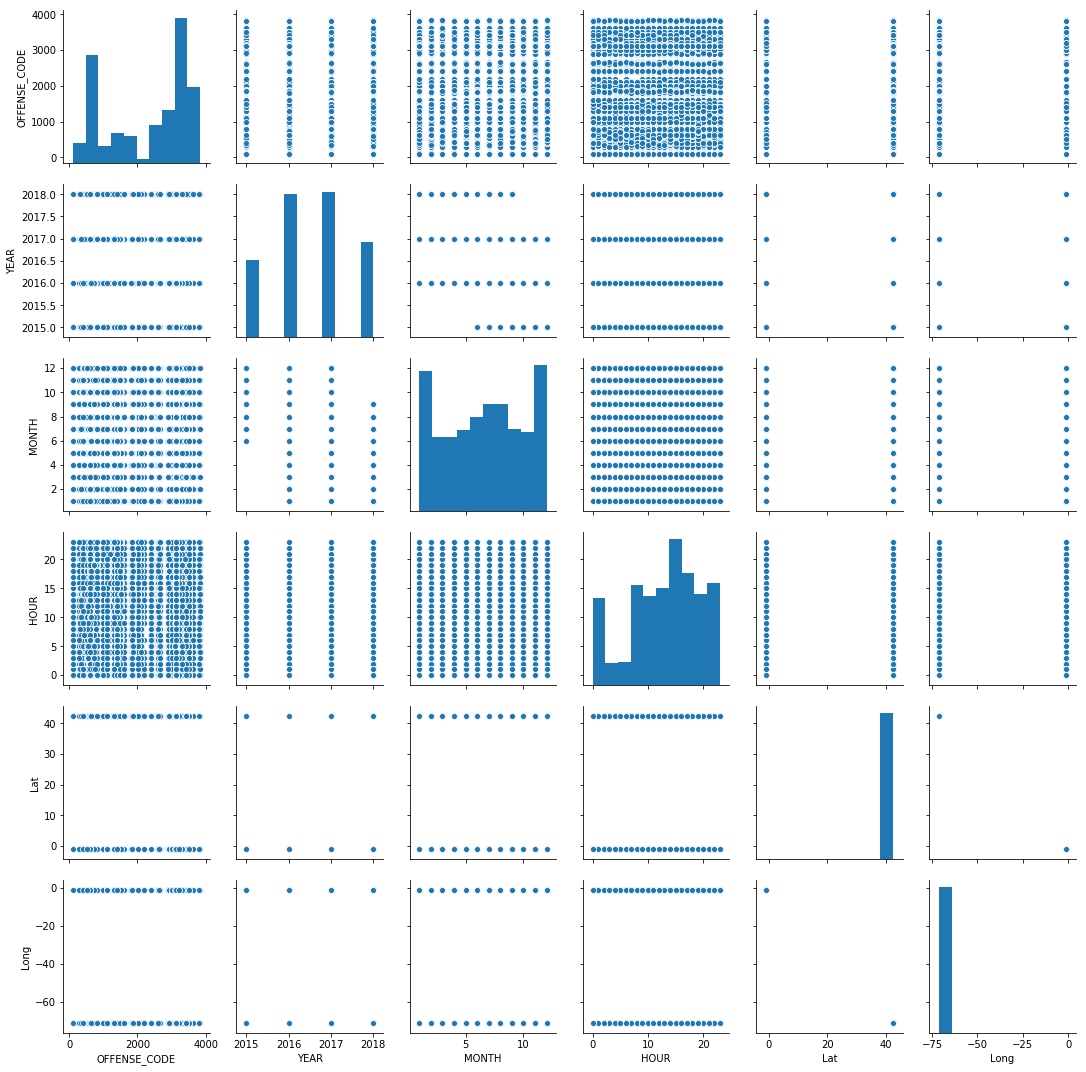

In [11]:
sns.pairplot(data)

In [12]:

data_mean = np.mean('MONTH')
print(data_mean)
tset, pval = ttest_1samp('MONTH', 7)
print('p-values',pval)
#95% confidence interval
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("rejecting")
else:
  print("accepting")

TypeError: cannot perform reduce with flexible type

In [ ]:
data_mean = np.mean('DAY_OF_WEEK')
print(data_mean)
tset, pval = ttest_1samp('DAY_OF_WEEK', 'Saturday')
print('p-values',pval)
#95% confidence interval
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("rejecting")
else:
  print("accepting")

In [13]:
data_mean = np.mean('HOUR')
print(data_mean)
tset, pval = ttest_1samp('HOUR', '15')
print('p-values',pval)
#95% confidence interval
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("rejecting")
else:
  print("accepting")

TypeError: cannot perform reduce with flexible type

In [18]:
MonthX = 'MONTH'.reshape((-1, 1))
DayOFWeekY = 'DAY_OF_WEEK'.reshape((-1, 1))
model = LinearRegression()
model.fit(MonthX, DayOFWeekY)
model = LinearRegression().fit(MonthX, DayOFWeekY)
r_sq = model.score(MonthX, DayOFWeekY)
print('coefficient of determination:', r_sq)

AttributeError: 'str' object has no attribute 'reshape'